# Curse of Dimensionality and PCA

Dimensionality refers to the amount of features we have in a dataset.

The curse of dimensionality is a common phenomena when dealing with high dimensionality datasets. The issues generated are several, and imply struggles on measuring distance correctly, computational complexity, sparsity and even overfitting. The rule of thumb is that if you have more or similar number of dimensions to the number of samples in a dataset, you are probably going to face curse of dimensionality.

1. Sparsity: As the number of dimensions increases, the amount of data needed to represent the space grows exponentially. This leads to data becoming sparse in high-dimensional spaces.
2. Distance concentration: In high dimensions, the distance between any two points becomes less meaningful, as all points tend to be far apart from each other.
3. Increased computational complexity: Many algorithms' time and space requirements grow exponentially with the number of dimensions.
4. Overfitting: With more dimensions, models are more likely to fit noise in the training data, leading to poor generalization.


Funnily, Decision Trees are quite good at handling high dimensionality mainly for three reasons:
* The splitting process focuses in one feature at a time, handling by itself the curse of dimensionality at split level.
* The splitting process is some how a sort of feature selection, as it will go for one feature in each split that achieves the best gini.
* At the same time, irrelevant features will not be selected for splitting a node, unlike Linear Regression for example, so that irrelevant feature won't impact the model.

## PCA - Principal Component Analysis

PCA is a quite common dimensionality reduction technique, used extensively with tabular data and that offers good results. 

When we apply PCA:
1. Our data is transformed, being rotated and stretched in a way that represent as much variance as possible.
2. We obtain new features, named Principal Components, where the data is projected at.
3. The new features are not interpretable per se, and our previous understanding of the data is lost.

In consequence, PCA is similar to learning a latent space, where we know there are hidden characteristics in our data.

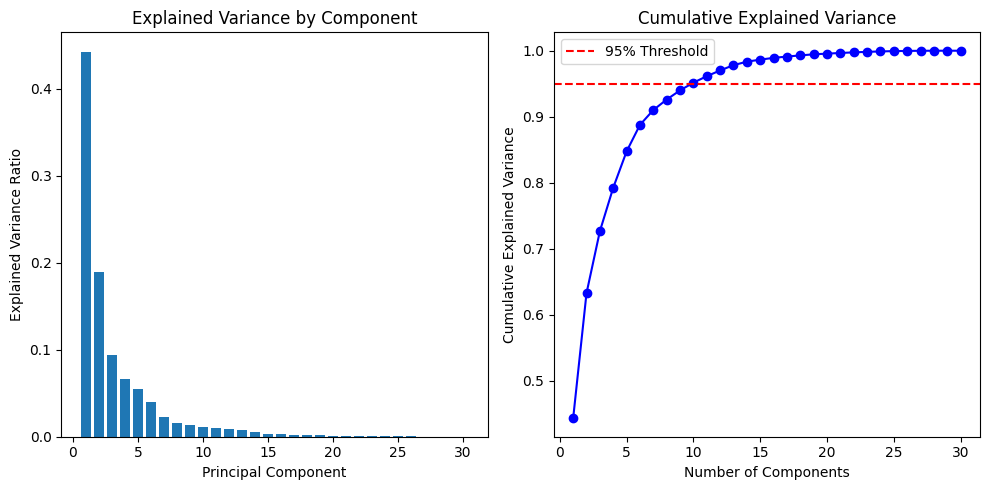

(569, 30)


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
np.set_printoptions(suppress=True)


data = load_breast_cancer()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Analyze explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

print(X.shape)

# So how does PCA work?

PCA reduces dimensions by finding 'new' ones that we call Principal Components. 

* The main strategy of PCA is transforming the data space into latent dimensions called Principal Components. 
* Those PCs will not be interpretable, but will capture the max amount of variance in our dataset.

<div class="row" align="center">
<img src="img/pca01.png" height="250"/>
<img src="img/pca02.png" height="250"/>
<img src="img/pca03.png" height="250"/>
</div>

## Matrices as transformations

A matrix can be interpreted as a linear transformation. And transformation is simply a complex way of saying 'function'. A function, as we know, is a piece of maths or code that given an input, spits an output. So then we have that matrices are linear functions.

But what means the linear part?
1. That in that transformation all lines remain lines.
2. The origin must remain in place.

<div class="row" align="center">
<img src="img/lineartransf.png" height="200"/>
</div>

In this example, M is a linear transformation that applied to A, outputs B. Then we have M', which is not a linear transformation (the origin stays in place but the diagonal line becomes morphed). 

If we have a vector $v = \begin{bmatrix}x \\ y \end{bmatrix}$, applying the transformation $M = \begin{bmatrix}5 & 2 \\ -1 & 2\end{bmatrix}$ we would end up in $M' = \begin{bmatrix}5x & 2y \\ -1x & 2y\end{bmatrix}$. 

As you can see, a matrix, is a transformation. And for example, the matrix $\begin{bmatrix}0 & -1 \\ 1 & 0\end{bmatrix}$ is a counterclockwise rotation.

# SVD - Singular Value Decomposition

Now, what SVD says is that any linear transformation can be represented as a rotation ($U$), a stretching ($Σ$) and another rotation ($V^t$)

$$ A ≈ UΣV^t $$

* $U$ is an m × r column-orthonormal matrix ; that is, each of its columns is a unit vector and the dot product of any two columns is 0.
* $V$ is an n × r column-orthonormal matrix. Note that we always use $V$ in its transposed form, so it is the rows of $V^t$ that are orthonormal.
* $Σ$ is a diagonal matrix; that is, all elements not on the main diagonal are 0. The elements of $Σ$ are called the singular values of $M$.

<div class="row" align="center">
<img src="img/svd01.png" height="400"/>
<img src="img/svd02.png" height="400"/>
</div>

The intuitive steps for SVD $A = UΣV^t$ are:

1. First, we compute $A^t × A$ (it will be symmetric). As happens in Attention mechanism:
    * Information of how each column relates to each other
    * Meaning, this reveals how similar are the directions of the data to eachother.
2. Find the eigenvectors of $A^t × A$. These will be our $V$ matrix.
    * These vectors tell us the "natural directions" in our data
    * Its like finding the axes that best describe how our data 'spreads out'.
    * They must be orthogonal (perpendicular to each other, as we want the most independent directions possible)
2. Find the eigenvalues of $A^t × A$. Take their square root.
    * These square roots are our singular values $Σ$
    * They tell us "how important" each direction is, the actual 'stretching' amount.
3. Finally, compute $U$ using: $U = AV × Σ^{-1}$
    * This gives us the "left" rotation matrix
    * Each column captures  a different 'pattern' or 'latent feature' in data
    * First few columns represent most significant patterns

In [10]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [4, 0, 2, 1],
    [0, 3, -1, 2],
    [2, -1, 3, 0],
    [1, 2, 0, 4]
])

scaler = StandardScaler()
A_centered = scaler.fit_transform(A)

# 1. Compute A^T × A (covariance matrix)
ATA = A_centered.T @ A_centered

print("ATA: \n", np.array_str(ATA, precision=4))

ATA: 
 [[ 7.      6.5228  7.     -5.2415 -5.2415]
 [ 6.5228  7.      6.5228 -4.5681 -4.5681]
 [ 7.      6.5228  7.     -5.2415 -5.2415]
 [-5.2415 -4.5681 -5.2415  7.      7.    ]
 [-5.2415 -4.5681 -5.2415  7.      7.    ]]


In [11]:
# 2 and 3. Find eigenvalues and eigenvectors using eigh (for symmetric matrices)
# eigh guarantees real eigenvalues and orthogonal eigenvectors
eigenvals, V = np.linalg.eigh(ATA)

# Sort eigenvalues and eigenvectors in descending order and by importance
idx = eigenvals.argsort()[::-1]
eigenvals = eigenvals[idx]
V = V[:, idx]

print("Eigenvals: \n", np.array_str(eigenvals, precision=4))
print("Eigenvectors: \n", np.array_str(V, precision=4))

Eigenvals: 
 [29.8909  4.5455  0.5636 -0.     -0.    ]
Eigenvectors: 
 [[-0.4654 -0.303   0.4377 -0.0058  0.7071]
 [-0.438  -0.4508 -0.7778  0.      0.    ]
 [-0.4654 -0.303   0.4377  0.0058 -0.7071]
 [ 0.433  -0.5537  0.0771  0.7071  0.0058]
 [ 0.433  -0.5537  0.0771 -0.7071 -0.0058]]


In [12]:
# 4. Calculate singular values (all eigenvalues should be non-negative now)
S = np.sqrt(np.abs(eigenvals))  # abs for numerical stability
Sigma = np.diag(S)

print("Sigma: \n", np.array_str(Sigma, precision=4))

Sigma: 
 [[5.4673 0.     0.     0.     0.    ]
 [0.     2.132  0.     0.     0.    ]
 [0.     0.     0.7507 0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]]


In [13]:
# 5. Compute U 
U = A_centered @ V @ np.linalg.inv(Sigma)
print("U: \n", np.array_str(U, precision=4))

U: 
 [[ 0.0113  0.6978  0.1271 -0.     -0.    ]
 [-0.2588  0.1538  0.074  -0.      0.    ]
 [-0.3938 -0.1183  0.0475 -0.      0.    ]
 [-0.5288 -0.3903  0.0209  0.      0.    ]
 [ 0.3685 -0.3283 -0.6773  0.     -0.    ]
 [ 0.5443 -0.3355  0.6696  0.      0.    ]
 [ 0.2574  0.3208 -0.2618 -0.     -0.    ]]


In [6]:
# Get principal components
principal_components = A_centered @ V

# Calculate explained variance
total_variance = np.sum(eigenvals)
explained_variance_ratio = eigenvals / total_variance

print("Principal components: \n", np.array_str(principal_components, precision=4))
print(f"Total variance: {total_variance:.04}")
print("Explained variance ratio: \n", np.array_str(explained_variance_ratio, precision=4))

Principal components: 
 [[-1.6082  0.7171  0.5203  0.    ]
 [ 1.984  -0.7171  0.4217  0.    ]
 [-1.984  -0.7171 -0.4217 -0.    ]
 [ 1.6082  0.7171 -0.5203 -0.    ]]
Total variance: 16.0
Explained variance ratio: 
 [0.8154 0.1286 0.0561 0.    ]


## Now if we try with the breast cancer dataset...

In [7]:
from src.pca import compute_pca
import matplotlib.pyplot as plt


A = load_breast_cancer().data

# Scale / center data
scaler = StandardScaler()
A_centered = scaler.fit_transform(A)

result = compute_pca(A_centered)
principal_components = result['principal_components'] 
total_variance = result['total_variance'] 
explained_variance_ratio = result['explained_variance_ratio']
cumulative_variance_ratio = result['cumulative_variance_ratio']

print("Original data:")
print(A)
print("\nSingular values:", S)
print("\nPercentage of variance explained by each component:")
print(explained_variance_ratio * 100)

# Print the transformed data
print("\nTransformed data (principal components):")
print(principal_components[:,:2])
print("Original ranges: ", A.min(), A.max())
print("Range of PCs: ", principal_components[:,:2].min(), principal_components[:,:2].max())

Original data:
[[ 17.99     10.38    122.8     ...   0.2654    0.4601    0.1189 ]
 [ 20.57     17.77    132.9     ...   0.186     0.275     0.08902]
 [ 19.69     21.25    130.      ...   0.243     0.3613    0.08758]
 ...
 [ 16.6      28.08    108.3     ...   0.1418    0.2218    0.0782 ]
 [ 20.6      29.33    140.1     ...   0.265     0.4087    0.124  ]
 [  7.76     24.54     47.92    ...   0.        0.2871    0.07039]]

Singular values: [3.61189668 1.43427433 0.94713227 0.00000003]

Percentage of variance explained by each component:
[44.27202561 18.97118204  9.39316326  6.60213492  5.49576849  4.02452204
  2.25073371  1.5887238   1.38964937  1.16897819  0.97971899  0.8705379
  0.80452499  0.52336575  0.31378322  0.26620934  0.19799679  0.17539595
  0.16492531  0.10386467  0.09990965  0.09146468  0.08113613  0.06018336
  0.05160424  0.0272588   0.02300155  0.00529779  0.00249601  0.00044348]

Transformed data (principal components):
[[ -9.19283683   1.94858307]
 [ -2.3878018   -3.76817

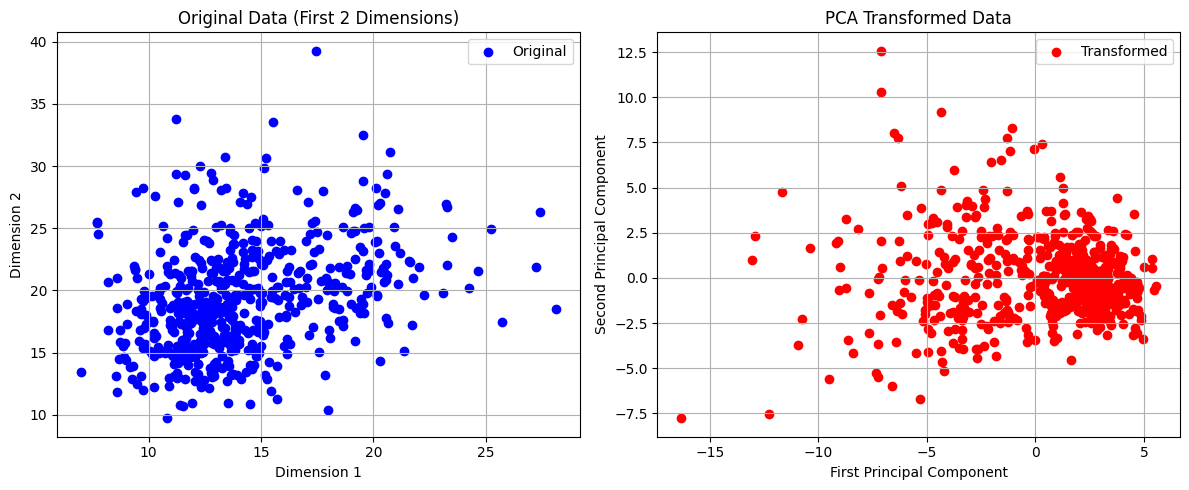

In [8]:
plt.figure(figsize=(12, 5))

# Original data (first two dimensions)
plt.subplot(121)
plt.scatter(A[:, 0], A[:, 1], c='blue', label='Original')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Original Data (First 2 Dimensions)')
plt.grid(True)
plt.legend()

# Transformed data (first two principal components)
plt.subplot(122)
plt.scatter(principal_components[:, 0], principal_components[:, 1], 
           c='red', label='Transformed')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Transformed Data')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

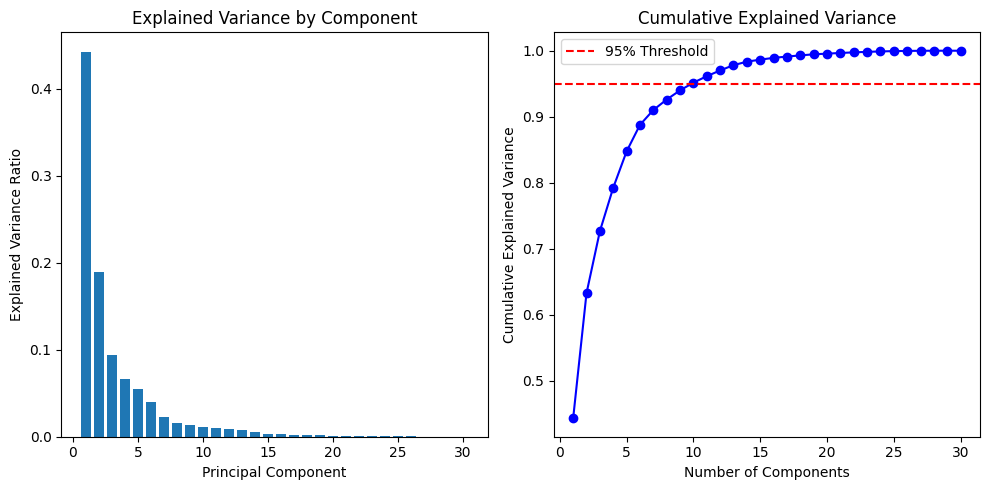

(569, 30)


In [9]:
# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

print(X.shape)

As you can see, we computed Eigenvalues and Eigenvectors. The relevant part here is that Eigenvalues tell you "how much a vector gets stretched" when you apply your matrix transformation. Imagine pushing or pulling a rubber sheet:

* If eigenvalue = 2, that direction gets stretched to twice its length
* If eigenvalue = 0.5, that direction shrinks to half its length
* If eigenvalue is negative, the direction gets flipped and scaled
* Eigenvalues can be negative or complex numbers, that is why we take Singular values which are positive real numbers.

On the other side, Eigenvectors are some sort of special vectors that when transformed by a matrix, only change in strength but not direction. The amount of change is represented by a scalar that is actually the Eigenvalue.

## What other uses do we have for PCA and SVD?

SVD (Singular Value Decomposition) and PCA (Principal Component Analysis) have several powerful applications beyond dimensionality reduction. Here are the key ones:

1. Matrix Approximation/Compression:
    - SVD lets you find the best low-rank approximation of a matrix
    - Useful in image compression
    - Can reconstruct data with minimal information loss
    - Example: Reducing a 1000x1000 image matrix to rank-50 approximation while preserving main features

2. Denoising/Signal Processing:
    - Small singular values often correspond to noise
    - By truncating them, you can clean signals
    - Works for images, time series, sensor data
    - Helps separate signal from background noise

3. Recommendation Systems:
    - SVD helps find latent features in user-item matrices
    - Used in collaborative filtering
    - Netflix's original recommendation algorithm used SVD
    - Can reveal hidden patterns in user preferences

4. Feature Importance Analysis:
    - Principal components show which variables drive most variance
    - Helps understand which features matter most
    - Used in finance to analyze risk factors
    - Useful for feature selection in ML

5. Topic modelling (often also done with LDA)
    - Document-term matrix is the input of SVD decomposition
    - Singular vectors become the latent 'topics'
    - Left singular vectors → document-topic weights
    - Right singular vectors → word-topic weights
    - Singular values are the strength of those relations.

# What about t-SNE?

t-SNE is another method for dimensionality reduction but in this case is NON LINEAR dimensionality reduction. It is a bit more complex algorithm than PCA, so we won't look at it here but:

* It performs dimensionality reduction, embedding the data into low dimensional space that is easy to visualize.
* Has some advantages as being better to visualize and explore data, as it not only projects but 'moves' and organizes data in clusters that helps visualization.
* That makes the distances and position of those dots and thus, the clusters, meaningless when trying to actually separate the data (i've seen this in some papers).
* Has the perplexity parameter that can be hard to tune.


If you want to read more about how to use t-SNE: https://distill.pub/2016/misread-tsne/

## Sources

* StatQuest PCA: https://www.youtube.com/watch?v=FgakZw6K1QQ
* Stanford Dimensionality Reduction class: https://www.youtube.com/watch?v=NeUccFkWYQw
* Stanford Dimensionality Reduction notes: http://infolab.stanford.edu/~ullman/mmds/ch11.pdf
* MIT Dimensionality Reduction class: https://ocw.mit.edu/courses/18-065-matrix-methods-in-data-analysis-signal-processing-and-machine-learning-spring-2018/resources/lecture-6-singular-value-decomposition-svd/